# OUR KAGGLE PROJECT!!

### Initialize

[Feature Engineering: 7 types of data](https://towardsdatascience.com/7-data-types-a-better-way-to-think-about-data-types-for-machine-learning-939fae99a689)

# 0. SET UP

In [50]:
# Initializing

# data processing. pandas as alias pd
import pandas as pd 
# linear algebra. numpy as alias np
import numpy as np 

# If you're working with a notebook, don't forget to use Matplotlib magic! 
%matplotlib inline
# matlab-style plotting
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
# Set the Seaborn theme if desired
sns.set_style("darkgrid")

# ignore sklearn & seaborn warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

#for some statistics
from scipy import stats
from scipy.stats import norm, skew  #ex. sns(fit = norm)


# Format scientific notation from pandas aggregation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [52]:
# import csv to train and test datasets in pandas dataframe
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv("./data/test.csv") 

Dropping ID column

In [53]:
# Dropping ID COLUMN --------------------------------------------------------------------------------------------------

#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train_df.shape))
print("The test data size before dropping Id feature is : {} ".format(test_df.shape))

#Save the 'Id' column
train_ID = train_df['Id']
test_ID = test_df['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
print("\n ----------ID column dropped both for train & test----------")
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train_df.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test_df.shape)) 

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

 ----------ID column dropped both for train & test----------

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [17]:
# train.describe()
# train.dtypes
# train.info()
# train.Alley

## 1. Simple EDA on Train Dataset

In [54]:
### Copying Feature Engineering from below.......

train_df['HalfBath'].describe()
train_df['HalfBath'].value_counts() 
#all bathrooms 
train_df['Num_Bathrooms'] = train_df['FullBath'] + train_df['HalfBath'] + train_df['BsmtFullBath'] + train_df['BsmtHalfBath']
#total area of external structures 
train_df['ExtStructSF'] =  train_df['WoodDeckSF'] + train_df['OpenPorchSF'] + train_df['EnclosedPorch'] + train_df['3SsnPorch'] + train_df['ScreenPorch']

#total house area 
train_df['HouseSF'] = train_df['TotalBsmtSF'] + train_df['GrLivArea'] + train_df['GarageArea'] 

#### EDA PURPOSE----------------------------------------- uncomment to graph

In [19]:
# #mapping nominal rankings to numerical for different features:  

# mp = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
# train_df['ExterQual'] = train_df['ExterQual'].map(mp)
# train_df['ExterCond'] = train_df['ExterCond'].map(mp)
# train_df['HeatingQC'] = train_df['HeatingQC'].map(mp)
# train_df['KitchenQual'] = train_df['KitchenQual'].map(mp)

**The Kernel need to be restarted if above block is ran**

In [20]:
# for i, col in enumerate(float_col):
#     plt.figure(i)
#     sns.regplot(x=col, y='SalePrice', data=train_df)
#     plt.show()

----------------------------------------------------------------------------------

correlation(train_df) vs SalePrice

In [55]:
# correlation matrix against the Target Variable: using train_DF
corr_matrix = train_df.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)


SalePrice        1.000
HouseSF          0.808
OverallQual      0.791
GrLivArea        0.709
GarageCars       0.640
GarageArea       0.623
TotalBsmtSF      0.614
Num_Bathrooms    0.613
1stFlrSF         0.606
FullBath         0.561
TotRmsAbvGrd     0.534
YearBuilt        0.523
YearRemodAdd     0.507
GarageYrBlt      0.486
MasVnrArea       0.477
Fireplaces       0.467
ExtStructSF      0.391
BsmtFinSF1       0.386
LotFrontage      0.352
WoodDeckSF       0.324
2ndFlrSF         0.319
OpenPorchSF      0.316
HalfBath         0.284
LotArea          0.264
BsmtFullBath     0.227
BsmtUnfSF        0.214
BedroomAbvGr     0.168
ScreenPorch      0.111
PoolArea         0.092
MoSold           0.046
3SsnPorch        0.045
BsmtFinSF2      -0.011
BsmtHalfBath    -0.017
MiscVal         -0.021
LowQualFinSF    -0.026
YrSold          -0.029
OverallCond     -0.078
MSSubClass      -0.084
EnclosedPorch   -0.129
KitchenAbvGr    -0.136
Name: SalePrice, dtype: float64

# 2. Removing Outliers: using Simple Linear Regression
Our Feature Engineered Variable, "HouseSF" has very high correlation to our target variable. <br>
Therefore, we have removed the top 12 outliers

In [56]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
## fit your linear model with fit() function
ols.fit(train_df[['HouseSF']], train_df['SalePrice'])
rss = (train_df['SalePrice']-ols.predict(train_df[['HouseSF']]))

In [57]:
rss.sort_values(ascending=False).head(10).index
train_df = train_df.drop(train_df.index[[691, 898, 1182, 803, 1169, 1046, 688, 769, 1181, 440]])
train_df=train_df[train_df['HouseSF']<8000]

## Getting Ready for 'Real' Feature Engineering

combine Train and Test for bigger dataset

In [58]:
### COMBINING TRAIN AND TEST[- Response] FOR BIGGER DATASET ----------------------------------------------------------------

# a) get row numbers for both
rntrain = train_df.shape[0]
rntest = test_df.shape[0]
# b) store Y
y_train = train_df.SalePrice.values
#c) concat train & test
all_data = pd.concat((train_df,test_df)).reset_index(drop=True) #make sure to reset index, because they will be overlapped
#d) drop target value
all_data.drop(['SalePrice'], axis=1, inplace=True)  # axis=1 & inplace=True; to make it have impact

print("Size of all_data : {} rows and {} columns".format(all_data.shape[0], all_data.shape[1])) 

Size of all_data : 2907 rows and 82 columns


In [59]:
all_data.sample(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExtStructSF,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseSF,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,Num_Bathrooms,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
501,1214,0,0,NaN,2,1Fam,TA,No,698.000,96.000,ALQ,GLQ,1.000,0.000,TA,420.000,Y,Feedr,Norm,SBrkr,184,184.000,TA,TA,MetalSd,MetalSd,GdPrv,NaN,0,CBlock,1,Typ,461.000,2.000,Fa,Unf,Fa,Detchd,1965.000,1214,0,GasA,Ex,2889.000,1Story,1,TA,Lvl,Gtl,9170,Corner,70.000,Reg,0,20,RL,0.000,None,Shed,400,4,Edwards,2.000,0,7,5,Y,0,NaN,CompShg,Hip,Normal,WD,0,Pave,6,1214.000,AllPub,0,1965,1965,2007
533,820,527,0,NaN,3,2fmCon,TA,Gd,969.000,0.000,GLQ,Unf,1.000,0.000,Gd,148.000,Y,Norm,Norm,SBrkr,148,233.000,TA,TA,MetalSd,MetalSd,NaN,NaN,0,CBlock,1,Typ,0.000,0.000,NaN,NaN,NaN,NaN,nan,1347,0,GasA,TA,2464.000,2Story,1,TA,Lvl,Gtl,7000,Inside,70.000,Reg,0,190,RL,0.000,None,NaN,0,1,Edwards,2.000,0,7,5,N,0,NaN,CompShg,Gable,Normal,WD,0,Pave,5,1117.000,AllPub,85,1910,1991,2008
2820,1590,0,0,NaN,2,1Fam,TA,Gd,1122.000,0.000,GLQ,Unf,1.000,0.000,Ex,448.000,Y,Norm,Norm,SBrkr,0,nan,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,754.000,3.000,TA,Fin,TA,Attchd,2005.000,1590,1,GasA,Ex,nan,1Story,1,Ex,Lvl,Gtl,11645,Inside,78.000,Reg,0,20,RL,198.000,BrkFace,NaN,0,8,CollgCr,nan,80,5,8,Y,0,NaN,CompShg,Hip,Partial,New,0,Pave,6,1570.000,AllPub,176,2005,2006,2006
1586,1034,0,0,NaN,1,TwnhsE,TA,Gd,747.000,0.000,GLQ,Unf,1.000,0.000,Gd,235.000,Y,Norm,Norm,SBrkr,0,nan,TA,Gd,HdBoard,HdBoard,NaN,TA,1,CBlock,1,Typ,598.000,2.000,TA,Fin,TA,Attchd,1989.000,1034,0,GasA,Gd,nan,1Story,1,Gd,HLS,Mod,3907,Inside,35.000,IR1,0,120,RM,0.000,None,NaN,0,4,Blueste,nan,36,6,8,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,4,982.000,AllPub,141,1989,1989,2010
2243,691,862,0,NaN,3,1Fam,TA,No,414.000,0.000,Rec,Unf,0.000,0.000,Gd,277.000,Y,Norm,Norm,SBrkr,0,nan,TA,Gd,HdBoard,HdBoard,NaN,NaN,0,PConc,2,Typ,420.000,2.000,TA,Fin,TA,Attchd,1996.000,1553,1,GasA,Gd,nan,2Story,1,Gd,Lvl,Gtl,7875,Inside,63.000,Reg,0,60,RL,0.000,None,NaN,0,8,Gilbert,nan,44,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,691.000,AllPub,0,1996,1996,2007
2114,1242,742,0,Grvl,5,2fmCon,TA,Mn,196.000,0.000,Rec,Unf,0.000,0.000,TA,1046.000,Y,Norm,Norm,SBrkr,180,nan,TA,TA,Wd Sdng,Wd Sdng,MnPrv,NaN,0,PConc,2,Typ,360.000,1.000,NaN,NaN,NaN,Detchd,nan,1984,0,GasA,Gd,nan,2.5Unf,1,TA,Lvl,Gtl,8094,Inside,57.000,Reg,0,60,RM,0.000,None,Shed,1000,9,OldTown,nan,0,8,6,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,8,1242.000,AllPub,64,1910,1983,2008
1715,754,786,0,NaN,3,1Fam,TA,No,36.000,596.000,LwQ,GLQ,1.000,0.000,Gd,122.000,Y,RRAe,Norm,SBrkr,0,nan,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,495.000,2.000,TA,RFn,TA,Attchd,1994.000,1540,1,GasA,Ex,nan,2Story,1,Gd,Lvl,Gtl,9109,Inside,70.000,Reg,0,60,RL,0.000,None,NaN,0,10,SawyerW,nan,32,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,754.000,AllPub,140,1994,1994,2009
2324,1369,0,0,NaN,3,1Fam,TA,No,0.000,0.000,Unf,Unf,0.000,0.000,Gd,1369.000,Y,Feedr,Norm,SBrkr,0,nan,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,605.000,2.000,TA,Unf,TA,Attchd,2007.000,1369,0,GasA,Ex,nan,1Story,1,Gd,Lvl,Gtl,9910,Inside,75.000,Reg,0,20,RL,0.000,None,NaN,0,9,Somerst,nan,203,6,7,Y,0,NaN,CompShg,Gable,Partial,New,0,Pave,5,1369.000,AllPub,0,2007,2007,2007
935,1440,0,0,NaN,4,Duplex,TA,Gd,1440.000,0.000,GLQ,Unf,2.000,0.000,Gd,0.000,Y,Norm,Norm,SBrkr,0,321.000,TA,TA,MetalSd,MetalSd,NaN,NaN,0,PC

C:\Users\Young Min Cho\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


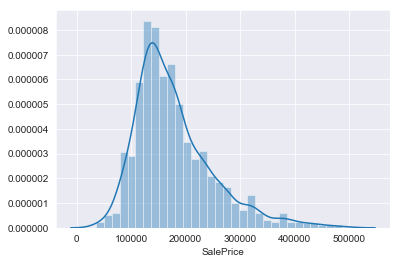

In [26]:
# Distribution Plot on Sales price: 
sns.distplot(train_df['SalePrice'])

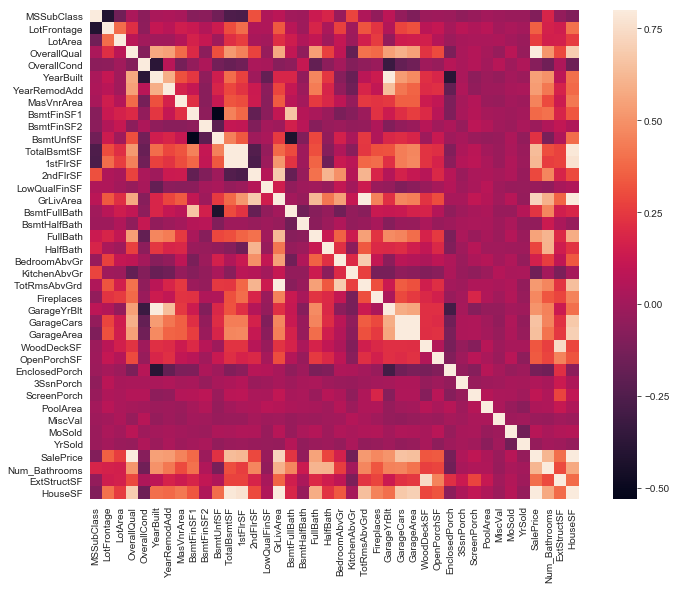

In [10]:
#Correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

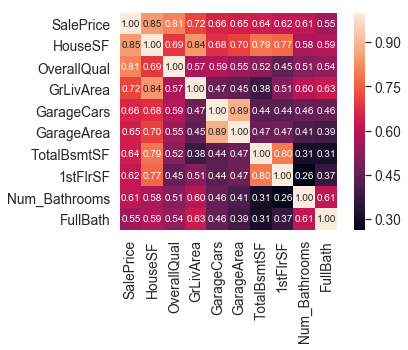

In [11]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show() 

In [29]:
### EXAMPLE of a PAIR PLOT

# sns.set()
# cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# sns.pairplot(train_df[cols], size = 2.5)
# plt.show()

### Identifying Missing Values

In [60]:
#missing data
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)  

,Total,Percent
PoolQC,2899,0.997
MiscFeature,2802,0.964
Alley,2709,0.932
Fence,2337,0.804
ExtStructSF,1459,0.502
Num_Bathrooms,1459,0.502
HouseSF,1459,0.502
FireplaceQu,1420,0.488
LotFrontage,486,0.167
GarageCond,159,0.055


In [61]:
missing_data[missing_data['Total'] > 22].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'ExtStructSF', 'Num_Bathrooms', 'HouseSF', 'FireplaceQu', 'LotFrontage', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageYrBlt', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MasVnrArea'], dtype='object')

**There is one row of missing data for Electrical**

In [62]:
all_data[all_data['Electrical'].isnull()] 

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExtStructSF,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseSF,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,Num_Bathrooms,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1367,754,640,0,NaN,3,1Fam,TA,No,0.000,0.000,Unf,Unf,0.000,0.000,Gd,384.000,Y,Norm,Norm,NaN,0,100.000,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,400.000,2.000,TA,Fin,TA,BuiltIn,2007.000,1394,1,GasA,Gd,2178.000,SLvl,1,Gd,Lvl,Gtl,9735,Inside,73.000,Reg,0,80,RL,0.000,None,NaN,0,5,Timber,3.000,0,5,5,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,7,384.000,AllPub,100,2006,2007,2008


#### Removing Missing Features

In [63]:
# drop total > 24
all_data = all_data.drop((missing_data[missing_data['Total'] > 24]).index,1)
# drop 1 row of electrical that has Null Value
all_data = all_data.drop(all_data.loc[all_data['Electrical'].isnull()].index)



In [64]:
# Dropping Features
all_data = all_data.drop("Utilities", axis=1)   # Skewed 100%
all_data = all_data.drop("BsmtUnfSF", axis=1)   # Skewed and Continuous
all_data = all_data.drop("MasVnrArea", axis=1)  # Skewed and Continuous
all_data = all_data.drop("MasVnrType", axis=1)  # Correlated to MasVnrArea
all_data = all_data.drop("Exterior2nd", axis=1) # Correlated to Exterior1st
all_data = all_data.drop("GarageCars", axis=1)  # Correlated to GarageArea Discrete
all_data = all_data.drop("SaleType", axis=1)    # Type of Sale depends on the buyer not the price 

### Imputation

In [65]:
# IMPUTATION BY MEDIUM

# continuous
all_data["BsmtFinSF1"].fillna(all_data["BsmtFinSF1"].median(), inplace=True) 
# continuous
all_data["BsmtFinSF2"].fillna(all_data["BsmtFinSF2"].median(), inplace=True) 
# continuous
all_data["GarageArea"].fillna(all_data["GarageArea"].median(), inplace=True) 
# continuous
all_data["TotalBsmtSF"].fillna(all_data["TotalBsmtSF"].median(), inplace=True) 

# IMPUTATION BY 0
# Both of these features have identical missing values. Also missing values on other Bsmt. Safely fill them with 0s
for col in ["BsmtFullBath",'BsmtHalfBath']:
    all_data[col].fillna(0, inplace = True)

# IMPUTATION BY MODE
all_data["Exterior1st"].fillna(all_data["Exterior1st"].mode()[0], inplace = True)
# Nominal
all_data["Neighborhood"].fillna(all_data["Neighborhood"].mode()[0], inplace=True) 
# Nominal
all_data["KitchenQual"].fillna(all_data["KitchenQual"].mode()[0], inplace=True) 
# Nominal
all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0], inplace = True)
# Nominal
all_data["Functional"].fillna(all_data["Functional"].mode()[0], inplace=True) 


In [66]:
all_data.RoofMatl.value_counts() 

CompShg    2865
Tar&Grv      23
WdShake       9
WdShngl       6
Roll          1
Membran       1
Metal         1
Name: RoofMatl, dtype: int64

## Feature Engineering: 

In [67]:
all_data['HalfBath'].describe()
all_data['HalfBath'].value_counts() 

#all bathrooms 
all_data['Num_Bathrooms'] = all_data['FullBath'] + all_data['HalfBath'] + all_data['BsmtFullBath'] + all_data['BsmtHalfBath']

#total area of external structures 
all_data['ExtStructSF'] =  all_data['WoodDeckSF'] + all_data['OpenPorchSF'] + all_data['EnclosedPorch'] + all_data['3SsnPorch'] + all_data['ScreenPorch']

#total house area 
all_data['HouseSF'] = all_data['TotalBsmtSF'] + all_data['GrLivArea']  + all_data['GarageArea']




In [68]:
# Create YearRemodAgg column to depcit better estimate between YearBuilt and YearRemodAdd
all_data['mean_year'] = all_data[['YearBuilt', 'YearRemodAdd']].mean(axis=1)
all_data['YearRemodAgg']=all_data[['YearBuilt', 'mean_year']].max(axis=1) 

In [69]:
# Drop 'mean_year','YearBuilt','YearRemodAdd': Since we have made a new YearRemodAgg Column
all_data.drop(['mean_year','YearBuilt','YearRemodAdd'],axis=1,inplace=True)

In [70]:
#mapping nominal rankings to numerical for different features:  
mp = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
all_data['ExterQual'] = all_data['ExterQual'].map(mp)
all_data['ExterCond'] = all_data['ExterCond'].map(mp)
all_data['HeatingQC'] = all_data['HeatingQC'].map(mp)
all_data['KitchenQual'] = all_data['KitchenQual'].map(mp) 

In [41]:
# float_col = float_col.drop('Num_Bathrooms',axis=1)
# float_col = float_col.drop('HouseSF',axis=1)
# float_col = float_col.drop('ExStructSF',axis=1)

In [23]:
float_col = all_data.select_dtypes(['float64','int64'])


In [24]:
float_col.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fireplaces', 'FullBath', 'GarageArea', 'GrLivArea', 'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual', 'LotArea', 'LowQualFinSF', 'MSSubClass', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YrSold', 'Num_Bathrooms', 'ExtStructSF', 'HouseSF', 'YearRemodAgg'], dtype='object')

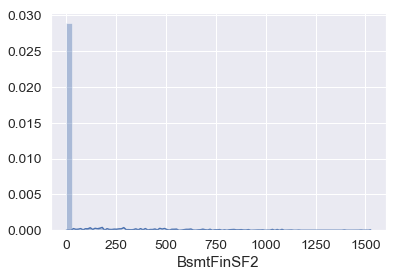

In [44]:
sns.distplot(all_data['BsmtFinSF2']);

In [45]:
all_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'ScreenPorch', 'Street', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YrSold', 'Num_Bathrooms', 'ExtStructSF', 'HouseSF', 'YearRemodAgg'], dtype='object')

Make sure to work with Year Data

In [71]:
# Drop columns that are already in use / low correlation between Target Variable (SalePrice)

all_data.drop(['1stFlrSF','2ndFlrSF','3SsnPorch','BedroomAbvGr','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath',
 'EnclosedPorch','ExterCond','FullBath','HalfBath','KitchenAbvGr','LotArea','LowQualFinSF','MiscVal','MoSold','OpenPorchSF',
'OverallCond','PoolArea','ScreenPorch','TotalBsmtSF','WoodDeckSF','YrSold','ExtStructSF'],axis=1,inplace=True) 

### Removing Low Corr. Categorical Variables

In [72]:
non_var_cols = ['LandSlope', 'Electrical', 'Functional', 'PavedDrive', 'Street', 'Condition1', 'Condition2', 'RoofMatl','LandContour', 'Heating', 'CentralAir']    
all_data.drop(non_var_cols, axis = 1, inplace = True) 


### Inspecting Remaining Nominal Categorical Variables 

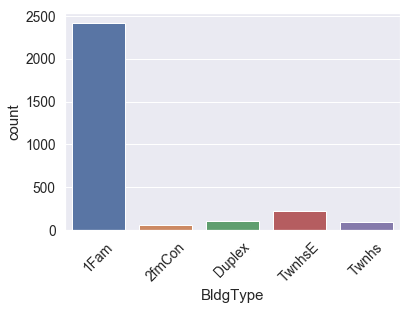

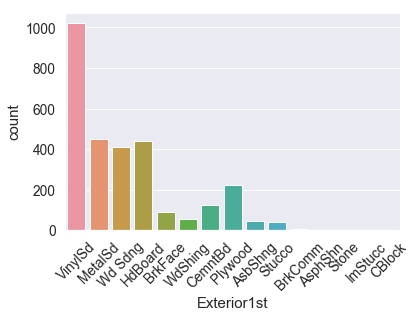

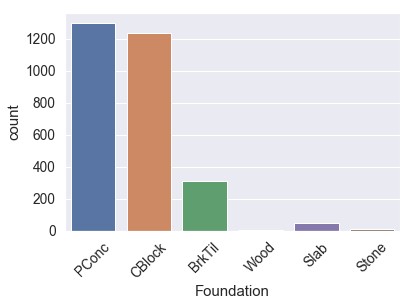

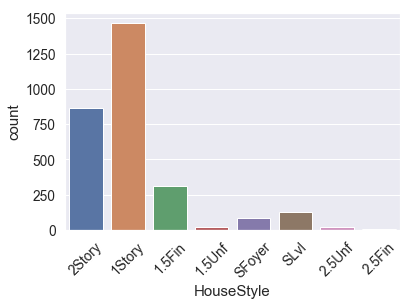

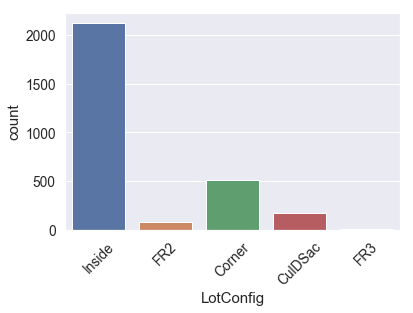

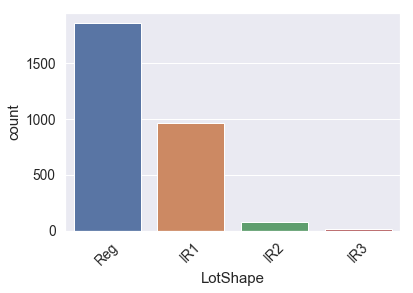

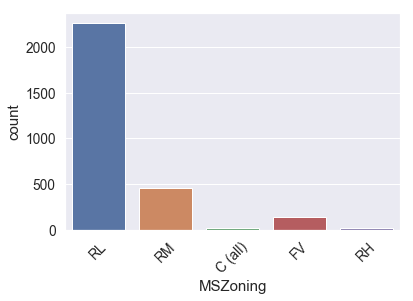

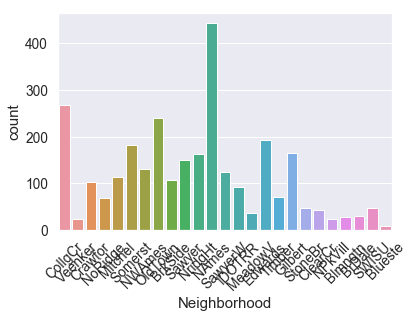

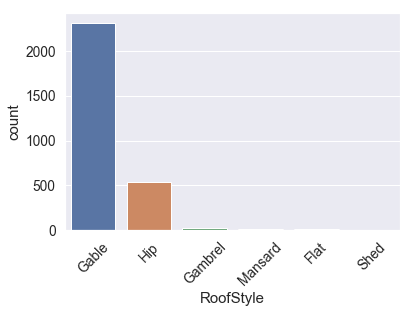

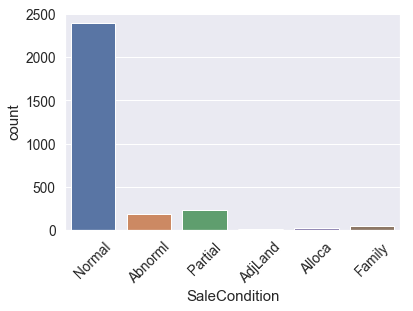

In [73]:
# sns.countplot on the Nominal Categorical Values to visualize
for i, col in enumerate(all_data.select_dtypes(['object']).columns):
    plt.figure(i)
    sns.countplot(x=col, data=all_data)
    plt.xticks(rotation=45)
    plt.show() 

In [ ]:
train_df.groupby('LandContour')['SalePrice'].mean()

In [ ]:
# There are outliers present in the training data
# GrLivArea: Above grade (ground) living area square feet
fig, ax = plt.subplots()
ax.scatter(x = train_df['LandContour'], y = train_df['SalePrice'], alpha = 0.6)
plt.ylabel('GarageArea', fontsize = 13)
plt.xlabel('GarageCars', fontsize = 13)
plt.show()

In [ ]:
#investigate mean sales price/neighborhood 

train_df.groupby('Neighborhood')['SalePrice'].agg('mean').plot('bar')

In [ ]:
#neighborhood sale price ranges boxplot 

f, ax = plt.subplots(figsize=(16, 12))
fig = sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = train_df) 
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=45)
plt.show()

### Dropping Nominal Categorical Variables that may have misrepresentation

In [28]:
# all_data.select_dtypes(['object']).columns


all_data.drop(['BldgType','LotConfig','MSSubClass','MSZoning','RoofStyle','SaleCondition'],axis=1,inplace=True) 

### Sanity check to ensure correct number of features is dropped 

In [29]:

all_data.shape

(2906, 16)

### Sum of NA values in all_data dataframe (should be 0)

In [42]:

sum(all_data.isnull().sum()) 

0

### Write all_data to csv pre-dummification (for tree-based models) 

In [ ]:
all_data.to_csv('data/all_data_no_dummies.csv')

## Dummify remaining nominal categorical variables 

In [43]:
all_data = pd.get_dummies(all_data) 

In [45]:
all_data.sample(10)

,ExterQual,Fireplaces,GarageArea,GrLivArea,HeatingQC,KitchenQual,OverallQual,TotRmsAbvGrd,Num_Bathrooms,HouseSF,YearRemodAgg,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
2653,4,1,575.000,1666,4,3,9,6,3.000,3907.000,2006.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2568,2,0,720.000,1073,3,2,4,6,2.000,2866.000,1968.500,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
810,2,1,275.000,1008,3,2,5,4,1.000,2291.000,1954.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
744,3,1,527.000,1720,4,3,7,7,3.000,3967.000,1996.000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1722,3,0,300.000,912,4,3,5,6,2.000,2124.000,1979.000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1837,2,0,340.000,1073,2,2,5,5,2.000,2486.000,1956.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
270,3,1,1053.000,1939,3,3,8,8,3.000,4087.000,2006.000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1341,3,1,666.000,3238,4,3,8,9,4.000,5937.000,1995.500,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1699,3,1,517.000,1836,4,3,8,8,2.000,4189.000,2008.500,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2240,2,1,390.000,1384,3,2,6,7,3.000,2158.000,1997.000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
#check dimensions of dummified df 

all_data.shape

(2906, 69)

## Write modified dataframe to CSV: 

In [49]:
all_data.to_csv('data/all_data.csv') 